<module 'matplotlib.pyplot' from 'C:\\Users\\llim8\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

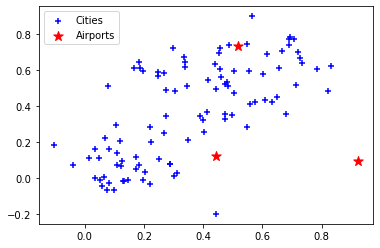

In [475]:
import random
import numpy as np
import math

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt


No handles with labels found to put in legend.


<module 'matplotlib.pyplot' from 'C:\\Users\\llim8\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

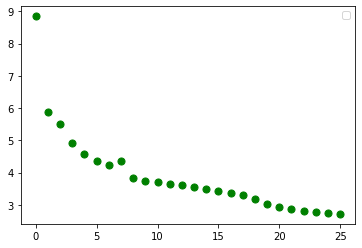

In [476]:
#set alpha this small so that we don't get overflows or over estimation for gradient
alpha = .006
cityList = list(cities)#convert the city to a list to iterate easier and to grab the values properly

#ClosestAirport function allows for us to allocate cities to each airport based on shortest distance
def closestAirport(airports):
    close = [[] for x in range(num_air)]#returning a nested list of city locations for each airport
    for city in cityList:
        tempDistance = []#each iteration will need a temp distance to see which one has the best distance
        for airs in airports:
            distance = math.sqrt((city[0]-airs[0])**2+(city[1]-airs[1])**2)#distance formula to calculate from city to airport
            tempDistance.append(distance)
        close[tempDistance.index(min(tempDistance))].append(city)#this will give us the shortest distanced city dependent on index for each airport
    for zeroes in close:#this is here to catch any airport that doesn't have a dedicated city
        if len(zeroes) <= 5:#if the list is too small, we can add another list to it
            for i in range(5):
                maxLength = []#gets the lengths of all airport's cities
                for lengths in close:
                    maxLength.append(len(lengths))
                maxNum = maxLength.index(max(maxLength))#we get the index of the airport with the most cities
                zeroes.append(max(close[maxNum]))#we get the furthest distance of that airport with the most cities and add it to the city of our choice
                close[maxNum].remove((max(close[maxNum])))#we remove that city from that airport
    return close

#GradientCalculator is here to simply measure the direction/magnitude for each airport across their cities
def gradientCalculation(port,citySet):
    accumulativeX = 0
    accumulativeY = 0
    for city in citySet:#sum of the X and Y magnitude/direction based on derivation
        accumulativeX += port[0]-city[0]
        accumulativeY += port[1]-city[1]
    return [accumulativeX*2*alpha,accumulativeY*2*alpha]#we are multiplying by 2 due to derivation, and by alpha to find optimal airports

#ObjectiveFunction merely calculates and obtains the total distance between airports and their respective cities
def objectiveFunction(close,airports):
    accumulativeSum = 0
    for index, port in enumerate(airports):
        for city in close[index]:
            accumulativeSum+= ((port[0]-city[0])**2+(port[1]-city[1])**2)#this acculumales the objective function formula
    return accumulativeSum

#need a new airport list since we can't change tuples in airports
newAirports = []
for i in airports:
    newAirports.append([i[0],i[1]])#x and y coords
gradientDistance=[]#we need this to keep track of our gradient progress
for i in range(25):
    closestCities = closestAirport(newAirports)#gathers the clusters belonging to each airport
    #print(len(closestCities[0]),len(closestCities[1]),len(closestCities[2]))
    gradientDistance.append(objectiveFunction(closestCities,newAirports))#keepts track of gradient distance

    delta = []#delta is here to obtain all the gradient calculations of derivation to subtract from currentAirport locations
    for index,port in enumerate(newAirports):
        delta.append(gradientCalculation(port,closestCities[index]))

    tempAirports = []#temp airports is the way to calculate the new locations of airports without overwriting newAirports in the process
    for index,port in enumerate(newAirports):
        tempAirports.append([port[0] - delta[index][0],port[1] - delta[index][1]])#simple x1 - deltax1 and so forth
    newAirports=tempAirports

#we have this line because we need to capture the last gradient distance calculated once the loop ends
gradientDistance.append(objectiveFunction(closestCities,newAirports))
gradientLine = []
for index,gradient in enumerate(gradientDistance):#convert to nested list to zip into scatter plot
    gradientLine.append([index,gradient])

zip_airs = zip(*gradientLine)
plt.scatter(*zip_airs, color='g', s=50)
plt.legend()
plt



<module 'matplotlib.pyplot' from 'C:\\Users\\llim8\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

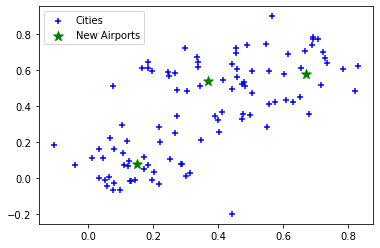

In [477]:
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*newAirports)
plt.scatter(*zip_airs, marker='*', color='g', s=100, label='New Airports')
plt.legend()
plt